# 参考資料
I/O 2019年8月号 「JUPYTER NOTEBOOK」 レシピ

http://webio.kohgakusha.co.jp/?s=%E3%80%8CJupyter+Notebook%E3%80%8D%E3%83%AC%E3%82%B7%E3%83%94+
8月号アカウント：io1980web/HYW3E67LaNQ8

In [1]:
# 樹形図描画ライブラリのインストール
!pip install graphviz
!pip install pydot

In [42]:
# 日本語フォントをダウンロード
!apt-get -y install fonts-ipafont-gothic

# キャッシュクリア
!rm /root/.cache/matplotlib/fontlist-v300.json # 消すべきcache

# 当処理実行後、ランタイム再起動する必要有
# See. "Google Colab リセットポイントのメモ".Qiita
# https://qiita.com/samacoba/items/56919806c2e8c840a71c

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 7 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 2s (4,261 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 131331 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-go

In [0]:
# Googleサジェストからキーワードを取得して、樹形図を描画する
def drawSuggest(g, keyword, nest):
  if nest > 2: return
 
  # Googleに接続してXMLデータを読む
  url = 'http://www.google.com/complete/search?ie=utf-8' \
        '&oe=utf-8&hl=ja&output=toolbar&q=' \
        + urllib.parse.quote_plus(keyword, encoding='utf-8')
  xml = urlopen(Request(url)).read()

  # ノードとして追加する
  if nest != 0:g.node(keyword, keyword)
  l = 0
  for child in ET.fromstring(xml):
    k = child[0].attrib['data']
    if(k.upper() == keyword.upper()):continue
    g.node(k, k)
    g.edge(keyword, k)
    drawSuggest(g, k, nest + 1)
    l = l +1
    if l >= 3:break

In [3]:
from graphviz import Digraph
from urllib.request import Request, urlopen
import xml.etree.ElementTree as ET 
import urllib

# 検索キーワード
MAINKEYWORD = 'G20'

# 樹形図生成処理実行
g = Digraph(format = 'png') # PDFも指定可能
g.attr('node', shape='ellipse', fontname="MS Gothic")
drawSuggest(g, MAINKEYWORD, 0)

# 結果生成
g.render('example', view = True)

'example.png'

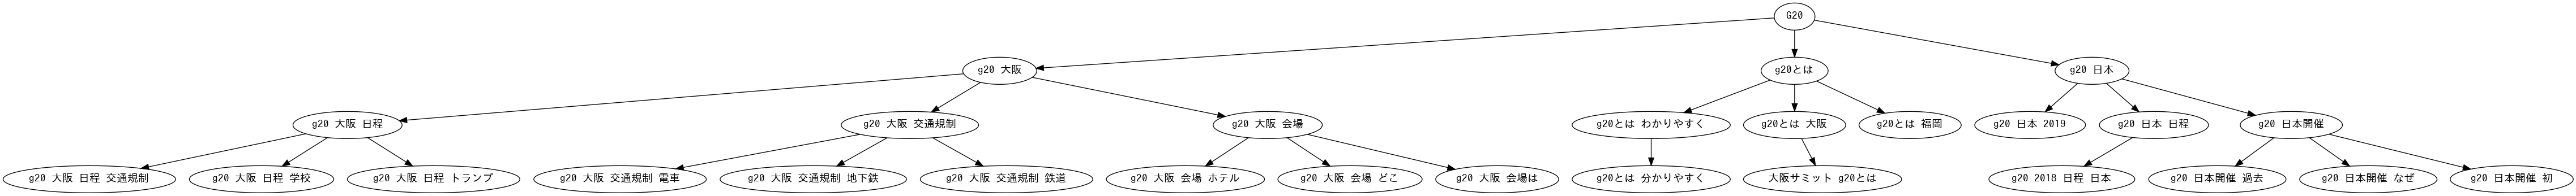

In [4]:
from IPython.display import Image
Image('example.png')